In [23]:
client_id = "X1oxq2YNfI38MKmGVkvv"
client_secret = "g3tnjxyCkx"

blog="https://openapi.naver.com/v1/search/blog?query="
news="https://openapi.naver.com/v1/search/news?query="
cafe="https://openapi.naver.com/v1/search/cafearticle?query="

import requests
from urllib.parse import quote
 
# 네이버 api call
def call(keyword, start, source):
    encText = quote(keyword)
    url = source + encText + "&display=100" + "&start=" + str(start)
    result = requests.get(url=url, headers={"X-Naver-Client-Id":client_id,
                                          "X-Naver-Client-Secret":client_secret})
    print(result)  # Response [200]
    return result.json()


# num * 1000개의 검색 결과 받아오기
def getResults(keyword, source, num):
    list = []
    for num in range(0,10*num):
        list = list + call(keyword, num * 100 + 1, source)['items'] # list 안에 키값이 ’item’인 애들만 넣기
    return list

In [24]:
import json

# "포항 맛집"으로, 블로그/뉴스/카페 검색
result_blog = getResults("포항 맛집",blog,1)
result_news = getResults("포항 맛집",news,1)
result_cafe = getResults("포항 맛집",cafe,1)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [25]:
# 검색 결과 Json으로 저장
file = open("naver_api/pohang_naver_blog.json", "w+")  # 파일을 쓰기 가능한 상태로 열기
file.write(json.dumps(result_blog))  # 쓰기

file = open("naver_api/pohang_naver_news.json", "w+")  # 파일을 쓰기 가능한 상태로 열기
file.write(json.dumps(result_news))  # 쓰기

file = open("naver_api/pohang_naver_cafe.json", "w+")  # 파일을 쓰기 가능한 상태로 열기
file.write(json.dumps(result_cafe))  # 쓰기

777884

In [26]:
import pandas as pd

# 저장된 파일 읽기
df_po_blog = pd.read_json("naver_api/pohang_naver_blog.json")
df_po_news = pd.read_json("naver_api/pohang_naver_news.json")
df_po_cafe = pd.read_json("naver_api/pohang_naver_cafe.json")

In [27]:
# 블로그 검색 결과
df_po_blog.head(10)

title  \
0                             신선했던 <b>포항 맛집</b> LIST   
1                             직접 다녀온 <b>포항 맛집</b> 공유   
2                           입소문 자자한 <b>포항 맛집</b> 리스트   
3                               흐뭇했던 <b>포항 맛집</b> 소개   
4                         끝내주는 <b>포항 맛집</b> 죽도시장 리스트   
5  <b>포항 맛집</b> &amp; 밥집 : 창우물회대게 ( 조금은 평범했던 물회... )   
6                               감탄했던 <b>포항 맛집</b> 모음   
7                               기깔났던 <b>포항 맛집</b> 공유   
8                            든든한 한끼 <b>포항 맛집</b> 포갈집   
9                                 믿고 먹는 <b>포항 맛집</b>   

                                                link  \
0  https://blog.naver.com/giselesj0414?Redirect=L...   
1  https://blog.naver.com/ccccmh89?Redirect=Log&l...   
2  https://blog.naver.com/hailey_eng?Redirect=Log...   
3  https://blog.naver.com/q0163020?Redirect=Log&l...   
4  https://blog.naver.com/mfb5643?Redirect=Log&lo...   
5  https://blog.naver.com/estrella1204?Redirect=L...   
6  https://blog.naver.com/106904?Redirect=Log&log...   
7  https://blog.naver.com/blumoonlight?Redirect=L...   
8  https://blog.naver.com/freesia6235?Redirect=Lo...   
9  https://blog.naver.com/seongyeun?Redirect=Log&...   

                                         description         bloggername  \
0  현지인 추천을 받은 <b>포항 맛집</b>에서 잊지 못할 든든한 한상차림을 즐겼답니...          쫑쫑이의 모든 순간   
1  지역 이름을 걸고 운영하는 만큼 맛은 물론 가성비도 뛰어난 <b>포항 맛집</b>이...  Ceci passera aussi   
2  포갈집에서 먹었던 메뉴 하나하나가 퀄리티도 좋고 풍성한 풍미를 선사해줘서 오랜만에 ...          헤일리 Hailey   
3  이번에 다녀온 <b>포항 맛집</b>은 식재료의 퀄리티도 높았고, 스끼다시와 메인요...            고라고라고라파덕   
4  저번 주엔 고향집에 내려갔다가, 간만에 만난 친구들과 <b>포항 맛집</b>에서 회...             DDONG'S   
5  내기준 밥집점수 : 2.5점 오빠 생일 겸 떠난 <b>포항</b>여행 2일차 점심은...               쏭쓰블로그   
6  점심식사로 미리 검색했던 유명하다는 대게전문점에 방문했는데 사장님이 직접 공수한 신...          다효의 빛나는 일상   
7  이 날 알게 된 <b>포항 맛집</b>은 서버분들도 친절하고 내부도 쾌적했지만, 무...  Written by hyunrua   
8  냉면 맛집이라고 해도 과언이 아닐 정도로 사이드메뉴도 품질이 높았어요. 양이 너무 ...              미엔느 뷰티   
9  얼마 전 친구들과 함께 포항에 다녀왔어요. 도착하자마자 배가 고팠던 우리는 밥부터 ...           연이의 달콤한 집   

                           bloggerlink  postdate  
0  https://blog.naver.com/giselesj0414  20201110  
1      https://blog.naver.com/ccccmh89  20201106  
2    https://blog.naver.com/hailey_eng  20201018  
3      https://blog.naver.com/q0163020  20201031  
4       https://blog.naver.com/mfb5643  20200929  
5  https://blog.naver.com/estrella1204  20201121  
6        https://blog.naver.com/106904  20201107  
7  https://blog.naver.com/blumoonlight  20201105  
8   https://blog.naver.com/freesia6235  20201103  
9     https://blog.naver.com/seongyeun  20200527

In [28]:
# 관련 라이브러리 설정
from konlpy.tag import Twitter
from konlpy.tag import Okt

from collections import Counter
import pandas as pd

from wordcloud import WordCloud

import matplotlib.pyplot as plt 
#import nltk

In [29]:
# JSON 데이터 읽어 오기
datafilename = 'naver_api/pohang_naver_blog.json' # 데이터 파일명
#datafilename = 'naver_api/shinhan_naver_cafe.json' # 데이터 파일명
#datafilename = 'naver_api/shinhan_naver_news.json' # 데이터 파일명

#datafilename = 'naver_api/samsung_naver_blog.json' # 데이터 파일명
#datafilename = 'naver_api/samsung_naver_cafe.json' # 데이터 파일명
#datafilename = 'naver_api/samsung_naver_news.json' # 데이터 파일명

df_json = pd.read_json(datafilename)               # 파일 읽기
df_json.head(2)

lists = df_json['description'].to_list()       # DataFrame에서 분석 부분 추출
lists[:5]      

['현지인 추천을 받은 <b>포항 맛집</b>에서 잊지 못할 든든한 한상차림을 즐겼답니다. 1. 포항 인어아저씨... 후식맛집이라 불리는 리틀리아로 방문해봤어요 단조로운 외관은 물론이고 낮인데도 환한조명을 켜놔서... ',
 '지역 이름을 걸고 운영하는 만큼 맛은 물론 가성비도 뛰어난 <b>포항 맛집</b>이라 소개해봅니다. 1. 포항... 그래서 꼭 한번 현지에서 먹어보고싶어 현지인들이 찾는다는 죽도시장 내 포항 3대 과메기 맛집에... ',
 '포갈집에서 먹었던 메뉴 하나하나가 퀄리티도 좋고 풍성한 풍미를 선사해줘서 오랜만에 <b>포항 맛집</b>에서 제대로 외식하고 왔어요. 주소 : 경상북도 포항시 북구 삼호로 213-1 번호 : 0507-1319-6519 영업시간 : 매일 17... ',
 '이번에 다녀온 <b>포항 맛집</b>은 식재료의 퀄리티도 높았고, 스끼다시와 메인요리 모~두 맛깔스러워서 무조건 단골각이에요! 2. 흑돈 (이베리코 맛집) 주소 : 경북 포항시 북구 장량로189번길 5-14 번호 : 0507-1379-2825... ',
 '저번 주엔 고향집에 내려갔다가, 간만에 만난 친구들과 <b>포항 맛집</b>에서 회포를 풀었어요. 현지인들... 그런가하면 간장게장도 포항 죽도시장 맛집의 별미였답니다. 비릴까봐 걱정했던 게 무색할 정도로... ']

In [30]:
parser_kor = Okt()  # Okt()를 활용한 형태소 분석
#twitter = Twitter() # Twitter()를 활용한 형태소 분석

morphs = []         # 단어를 담을 리스트 초기화
for sentence in lists:                       # 리스트에서 각 문장 추출
    morphs.append(parser_kor.pos(sentence))  # 문장 해석 후 단어 추출
    
#print(morphs)       # 분석 결과 출력

In [31]:
noun_list=[]  # 명사 추출을 위한 리스트 생성

for sentence in morphs: # 명사 추출
    noun_list.extend([word for word, tag in sentence if tag in ['Noun']])

# 명사 출현 빈도 개수를 세어, 빈번한 단어에 대한 Dictionaly 생성
worddict = dict(Counter(noun_list).most_common()) 
worddict

{'포항': 1896,
 '맛집': 1589,
 '곳': 188,
 '물회': 177,
 '추천': 162,
 '집': 130,
 '맛': 102,
 '횟집': 102,
 '식당': 99,
 '방문': 94,
 '시간': 89,
 '북구': 86,
 '포항시': 85,
 '죽도시장': 82,
 '경북': 79,
 '수': 79,
 '위치': 78,
 '일대': 76,
 '소개': 73,
 '주소': 72,
 '때': 71,
 '것': 66,
 '영업': 64,
 '친구': 64,
 '이': 64,
 '대게': 63,
 '오늘': 62,
 '여행': 59,
 '주차': 59,
 '메뉴': 58,
 '양덕': 58,
 '꼭': 55,
 '구룡포': 54,
 '회': 52,
 '매일': 50,
 '저': 50,
 '전': 50,
 '정말': 49,
 '더': 48,
 '남구': 47,
 '이번': 45,
 '제': 45,
 '한번': 44,
 '주문': 44,
 '곱창': 44,
 '날': 43,
 '또': 43,
 '점': 42,
 '여기': 41,
 '가게': 41,
 '밥': 41,
 '분': 41,
 '덕': 41,
 '근처': 40,
 '바로': 40,
 '시': 40,
 '검색': 39,
 '식사': 39,
 '가격': 39,
 '음식': 39,
 '포스팅': 39,
 '카페': 38,
 '고기': 38,
 '길': 37,
 '과메기': 36,
 '중': 36,
 '번': 36,
 '비': 36,
 '골목': 36,
 '짬뽕': 36,
 '환': 36,
 '휴무': 36,
 '주차장': 36,
 '사람': 35,
 '효자동': 35,
 '우리': 34,
 '초밥': 34,
 '지인': 33,
 '번길': 33,
 '다음': 33,
 '진짜': 33,
 '바다': 33,
 '이동': 33,
 '주말': 32,
 '저희': 32,
 '생각': 31,
 '아주': 31,
 '정도': 30,
 '그': 30,
 '앞': 30,
 '요': 29,
 '칼국수': 2

In [32]:
# 불필요한 명사 제거
# 제거 리스트
removelist = ['것', '내', '나', '수', '게', '말']
removelist.extend(['등', '달', '총', '위', '임', 
                   '이', '중', '거', '명'])

# dictionary에서 removelist있는 단어 제거
for num in removelist:
    if num in worddict.keys():
        del worddict[num]
        
worddict    # 결과 출력

{'포항': 1896,
 '맛집': 1589,
 '곳': 188,
 '물회': 177,
 '추천': 162,
 '집': 130,
 '맛': 102,
 '횟집': 102,
 '식당': 99,
 '방문': 94,
 '시간': 89,
 '북구': 86,
 '포항시': 85,
 '죽도시장': 82,
 '경북': 79,
 '위치': 78,
 '일대': 76,
 '소개': 73,
 '주소': 72,
 '때': 71,
 '영업': 64,
 '친구': 64,
 '대게': 63,
 '오늘': 62,
 '여행': 59,
 '주차': 59,
 '메뉴': 58,
 '양덕': 58,
 '꼭': 55,
 '구룡포': 54,
 '회': 52,
 '매일': 50,
 '저': 50,
 '전': 50,
 '정말': 49,
 '더': 48,
 '남구': 47,
 '이번': 45,
 '제': 45,
 '한번': 44,
 '주문': 44,
 '곱창': 44,
 '날': 43,
 '또': 43,
 '점': 42,
 '여기': 41,
 '가게': 41,
 '밥': 41,
 '분': 41,
 '덕': 41,
 '근처': 40,
 '바로': 40,
 '시': 40,
 '검색': 39,
 '식사': 39,
 '가격': 39,
 '음식': 39,
 '포스팅': 39,
 '카페': 38,
 '고기': 38,
 '길': 37,
 '과메기': 36,
 '번': 36,
 '비': 36,
 '골목': 36,
 '짬뽕': 36,
 '환': 36,
 '휴무': 36,
 '주차장': 36,
 '사람': 35,
 '효자동': 35,
 '우리': 34,
 '초밥': 34,
 '지인': 33,
 '번길': 33,
 '다음': 33,
 '진짜': 33,
 '바다': 33,
 '이동': 33,
 '주말': 32,
 '저희': 32,
 '생각': 31,
 '아주': 31,
 '정도': 30,
 '그': 30,
 '앞': 30,
 '요': 29,
 '칼국수': 29,
 '저녁': 29,
 '만': 28,
 '다시': 28,
 '점심'

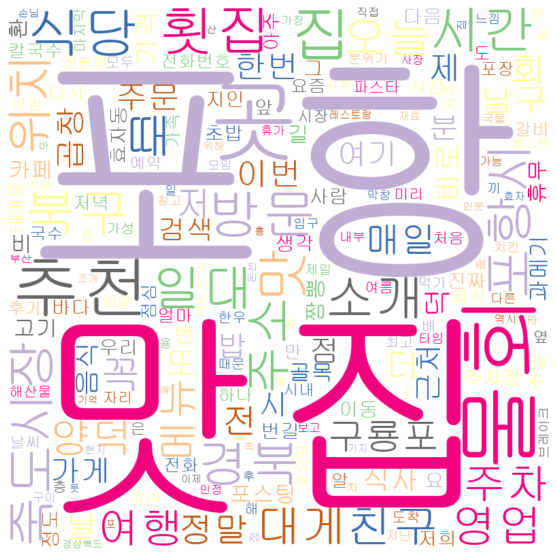

In [33]:
# wordcloud 초기화
wordcloud = WordCloud(
    font_path = 'c:/windows/fonts/gulim.ttc', # 윈도우 폰트 위치
#    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',  # 맥에선 한글폰트 설정.
    background_color='white',       # 배경 색깔 정하기
    colormap = 'Accent_r',          # 폰트 색깔
    # Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
    width = 800,
    height = 800
)

# wordcloud 생성
wordcloud_words = wordcloud.generate_from_frequencies(worddict)

# wordcloud 출력
fig = plt.figure(figsize=(10, 10))  # 그림 크기 설정
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# wordcloud 저장
fig.savefig('wc_pohang_naver_blog.png')
#fig.savefig('wc_shinhan_naver_cafe.png')
#fig.savefig('wc_shinhan_naver_news.png')
#fig.savefig('wc_samsung_naver_blog.png')
#fig.savefig('wc_samsung_naver_cafe.png')
#fig.savefig('wc_samsung_naver_news.png')